In [120]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [121]:
# 1. Load dataset
data = pd.read_csv('insurance.csv')

In [122]:
# 2. Initial Data Exploration
print("Initial Data Exploration:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nData Shape:", data.shape)
print("\nDescriptive Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDuplicate Count:", data.duplicated().sum())

Initial Data Exploration:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Data Shape: (1338, 7)

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000   

In [123]:
# 3. Remove duplicates
data.drop_duplicates(inplace=True)


In [124]:
numerical_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region']

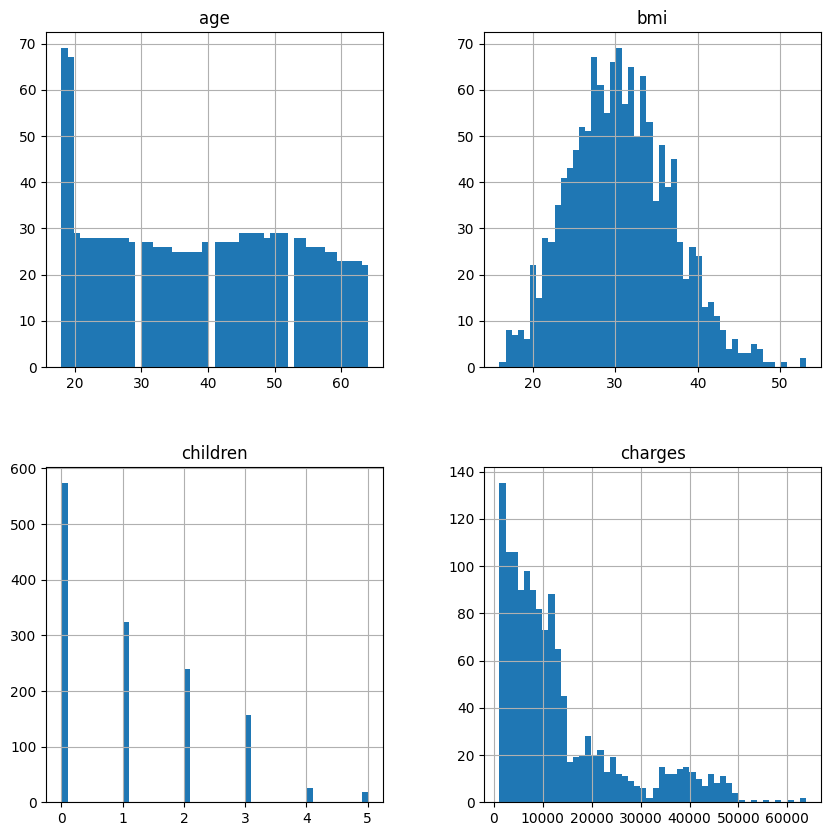

In [125]:
data.hist(bins=50, figsize=(10,10))
plt.show()

C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\1822747157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\1822747157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\1822747157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')


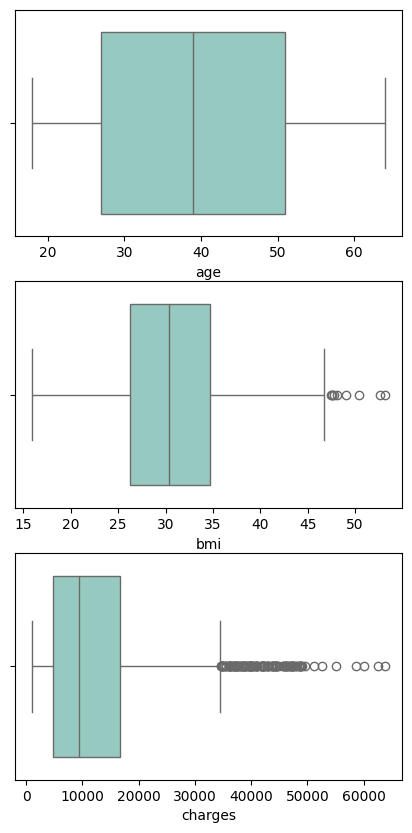

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan boxplot untuk seluruh kolom
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
for i, column in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
    axes[i].set_xlabel(column)

plt.show()

        jumlah sampel  persentase
sex                              
male              675        50.5
female            662        49.5


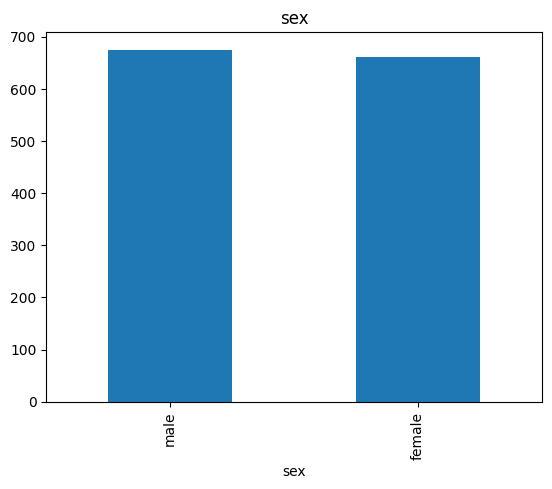

        jumlah sampel  persentase
smoker                           
no               1063        79.5
yes               274        20.5


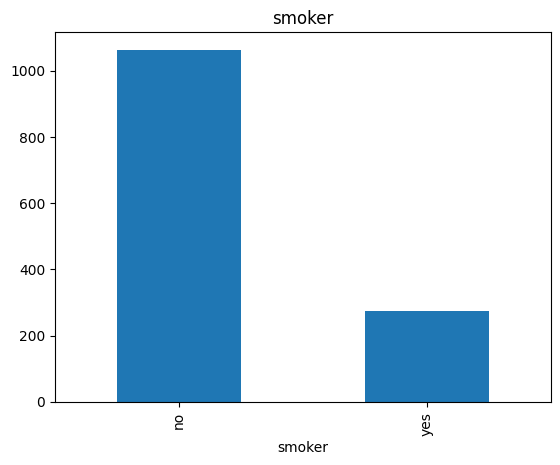

           jumlah sampel  persentase
region                              
southeast            364        27.2
southwest            325        24.3
northwest            324        24.2
northeast            324        24.2


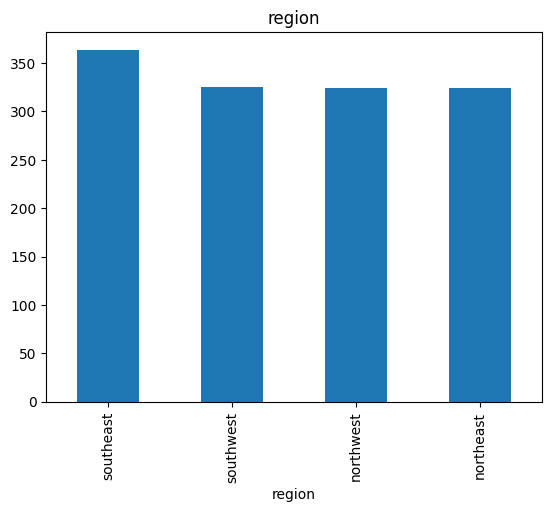

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categorical(data, categorical_features):
    for feature in categorical_features[:3]:
        count = data[feature].value_counts()
        percent = 100*data[feature].value_counts(normalize=True)
        df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
        print(df)
        count.plot(kind='bar', title=feature)
        plt.show()
plot_categorical(data, categorical_features)

C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\903219043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\903219043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
C:\Users\nimaa\AppData\Local\Temp\ipykernel_8600\903219043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", 

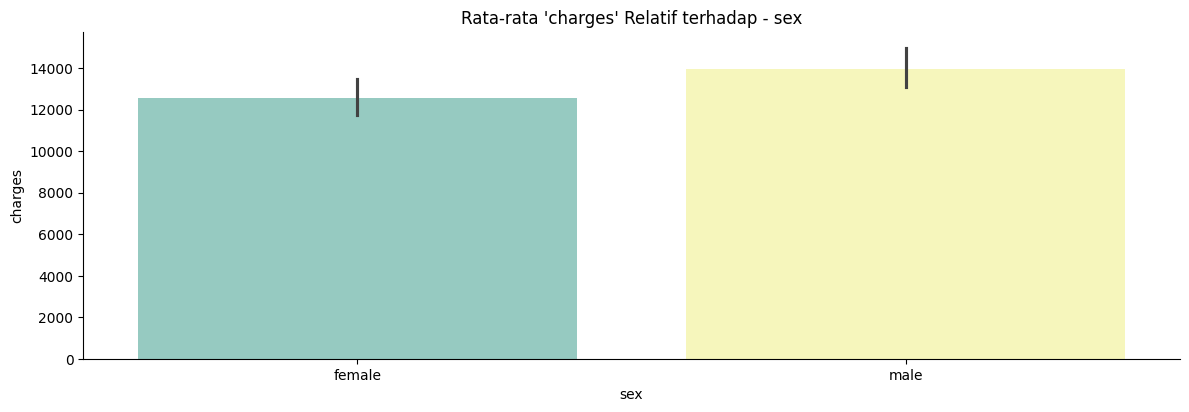

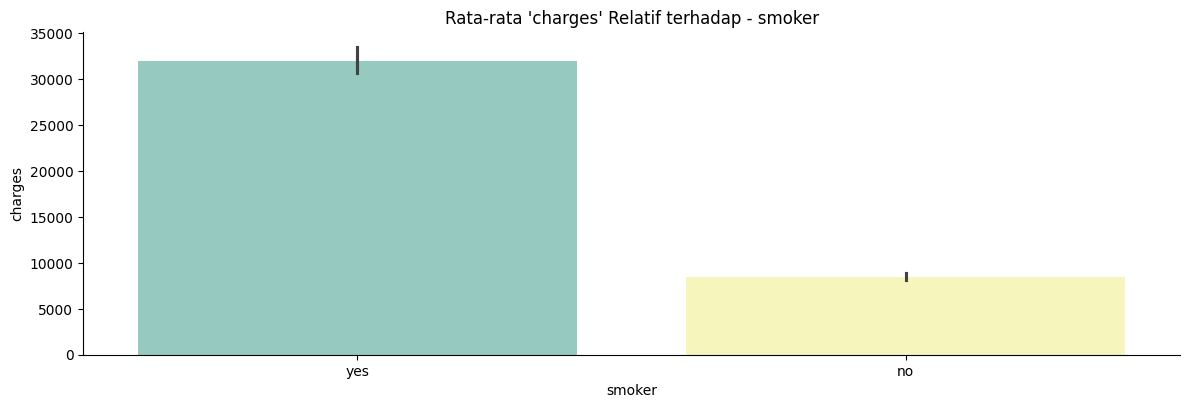

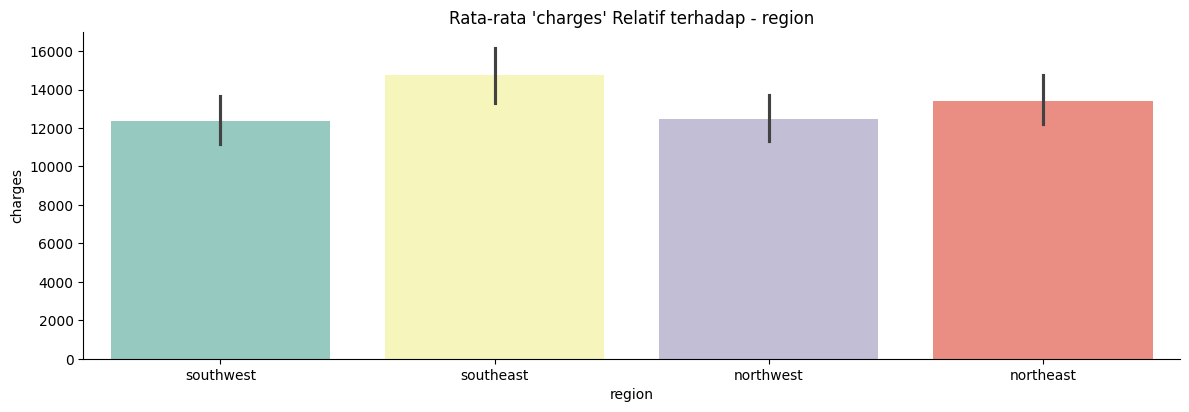

In [128]:
cat_features = data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

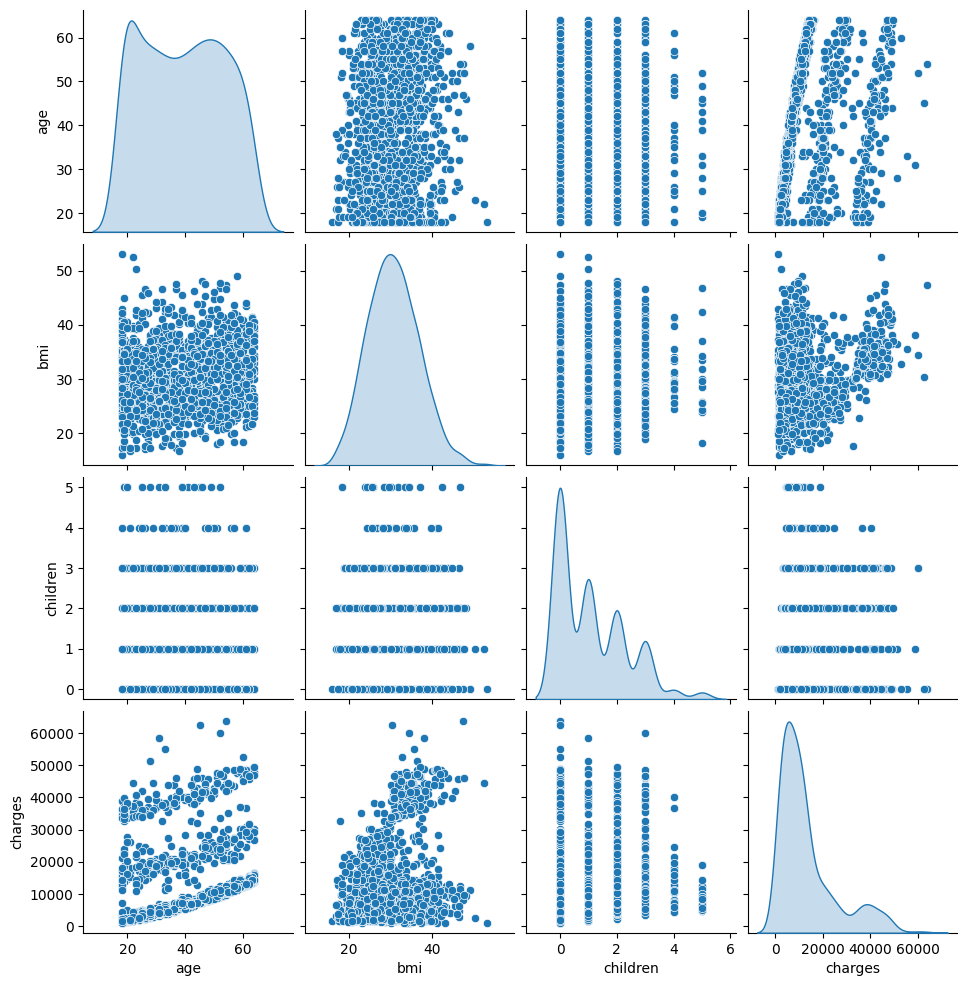

In [129]:
#Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

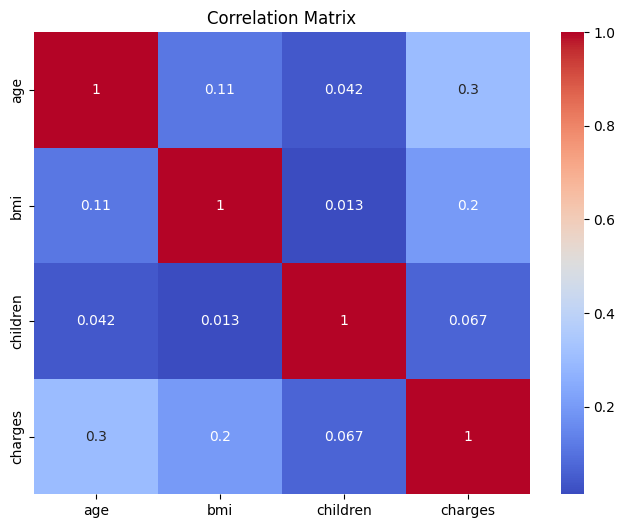

In [130]:
# 4.2 Correlation Analysis for Numeric Features
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [131]:

# 5. Feature Engineering and Transformation
# 5.1 Handle Outliers using IQR method
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = np.where(
            (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound),
            np.nan,
            df_clean[col]
        )
    return df_clean

data = handle_outliers(data, ['bmi', 'charges'])
data.dropna(inplace=True)


Results for Random Forest:
Cross Validation Scores: [0.76048527 0.67983264 0.73432549 0.77828648 0.68544739]
Average CV R² Score: 0.7277 (+/- 0.0788)
RMSE: 0.2088
MAE: 0.1050
R² Score: 0.9564


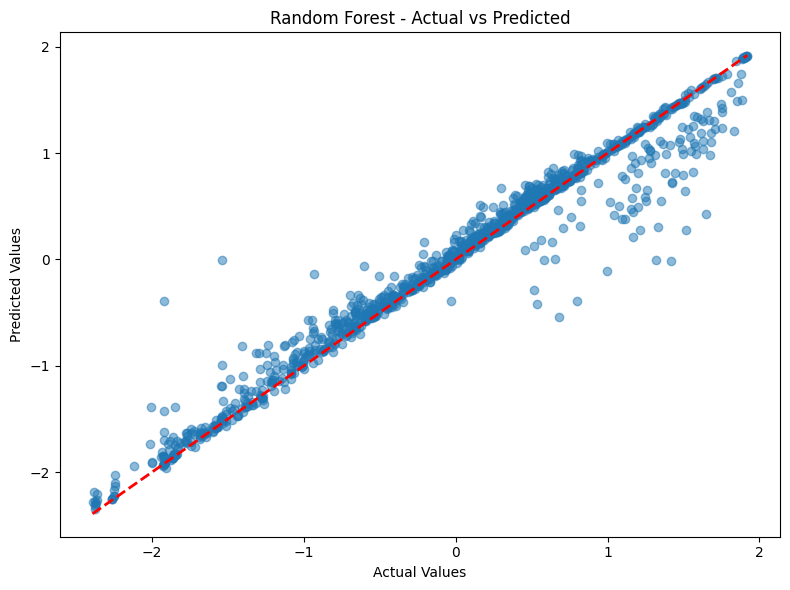


Results for Decision Tree:
Cross Validation Scores: [0.57561    0.51962993 0.48595013 0.4212903  0.49745594]
Average CV R² Score: 0.5000 (+/- 0.1000)
RMSE: 0.0808
MAE: 0.0047
R² Score: 0.9935


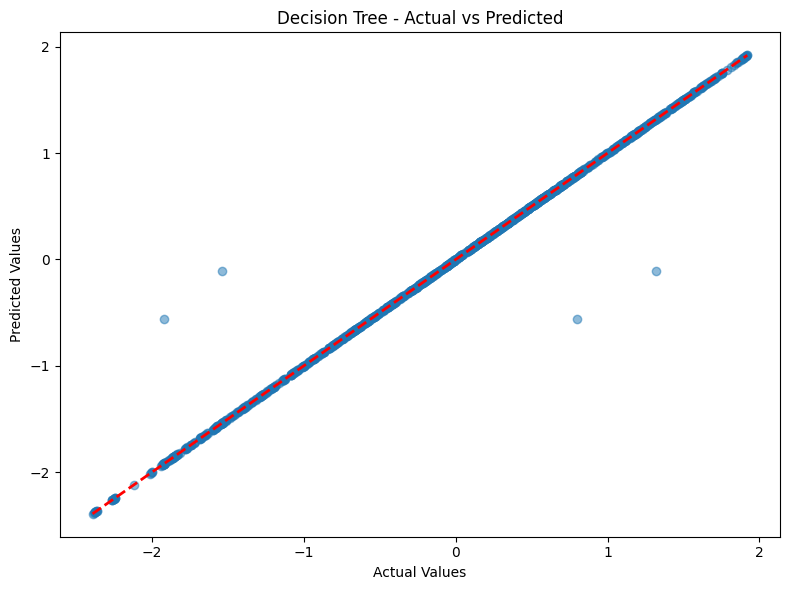


Results for KNN:
Cross Validation Scores: [0.72773955 0.65643821 0.69506864 0.69163432 0.63083644]
Average CV R² Score: 0.6803 (+/- 0.0670)
RMSE: 0.4492
MAE: 0.2749
R² Score: 0.7982


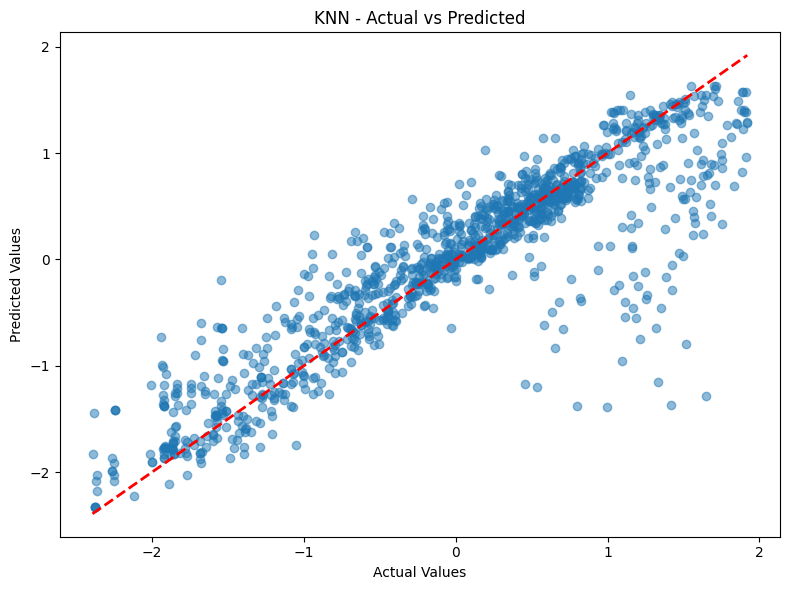


Results for Linear Regression:
Cross Validation Scores: [0.71915113 0.68938297 0.70527023 0.72724109 0.67271658]
Average CV R² Score: 0.7028 (+/- 0.0396)
RMSE: 0.5394
MAE: 0.3096
R² Score: 0.7091


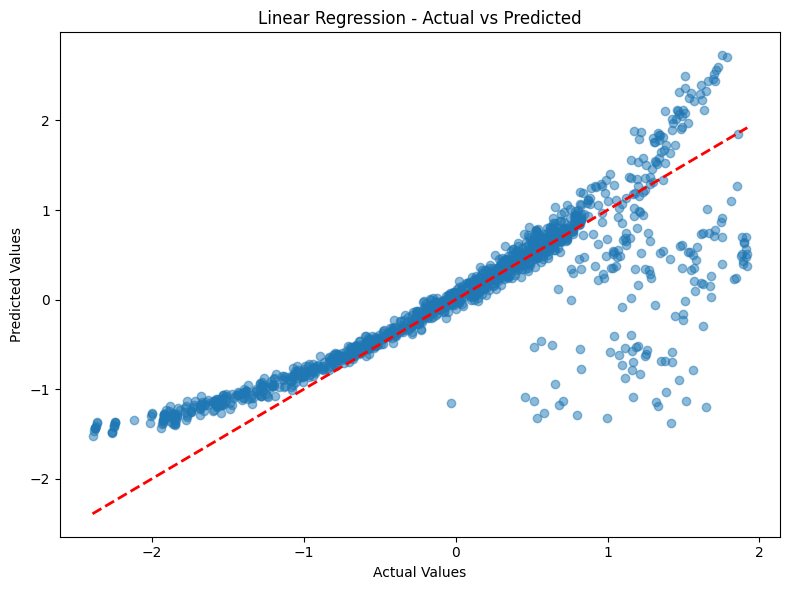

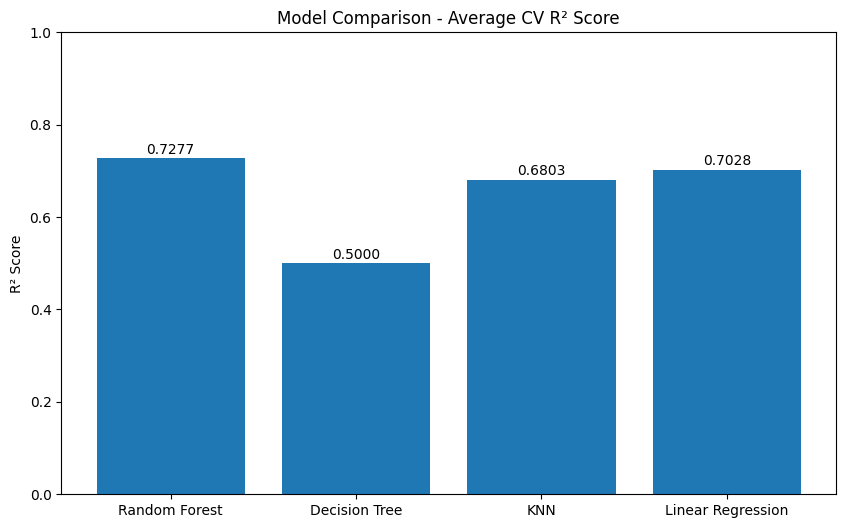

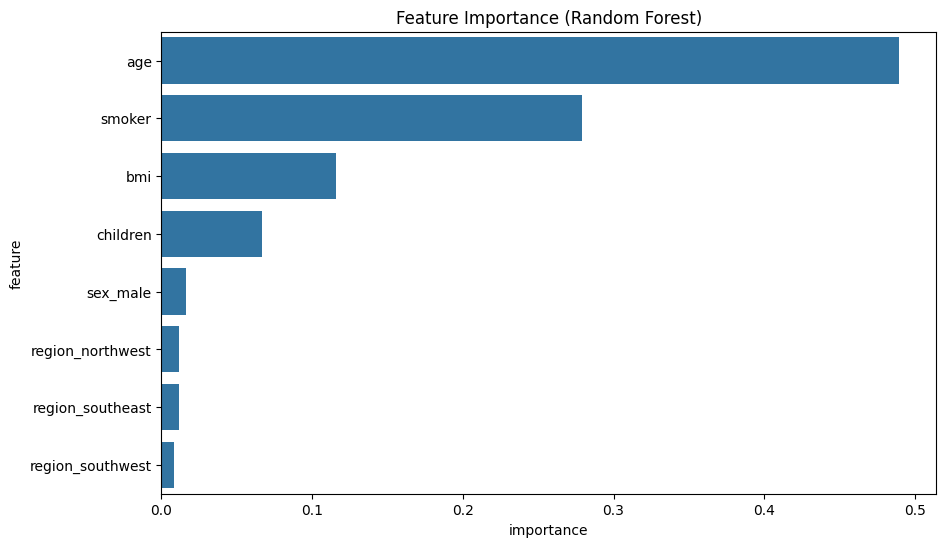


Best Model: Random Forest
Best Average CV R² Score: 0.7277


In [132]:


# 5.2 Transform Categorical Variables
# Label Encoding for binary categorical variables
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])

# One-hot encoding for non-binary categorical variables
data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)

# 5.3 Feature Transformation
# Using RobustScaler instead of PowerTransformer for better handling of outliers
numeric_features = ['age', 'bmi', 'children']
robust_scaler = RobustScaler()
data[numeric_features] = robust_scaler.fit_transform(data[numeric_features])

# Log transform for charges (since it's right-skewed)
data['charges'] = np.log1p(data['charges'])

# 5.4 Final scaling for charges
scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])

# 6. Model Preparation
X = data.drop('charges', axis=1)
y = data['charges']

# 7. Cross Validation Setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 8. Model Training and Evaluation
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
     'Linear Regression': LinearRegression()

}

# Function for detailed model evaluation
def evaluate_model_detailed(model, X, y, cv, model_name):
    # Cross validation scores
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    # Train the model on full data for feature importance
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"\nResults for {model_name}:")
    print(f"Cross Validation Scores: {cv_scores}")
    print(f"Average CV R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Visualization of actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.tight_layout()
    plt.show()
    
    return cv_scores.mean()

# 9. Train and evaluate all models
cv_results = {}
for name, model in models.items():
    cv_results[name] = evaluate_model_detailed(model, X, y, cv, name)

# 10. Visualize model comparison
plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values())
plt.title('Model Comparison - Average CV R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, v in enumerate(cv_results.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# 11. Feature Importance for Best Model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

if isinstance(best_model, RandomForestRegressor):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Best Average CV R² Score: {cv_results[best_model_name]:.4f}")